In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
cd ~

/Users/james


In [9]:
phenotypes = pd.read_table('pheno_emaize.txt',dtype='int')

ValueError: invalid literal for long() with base 10: 'test'

In [5]:
phenotypes = pd.read_table('pheno_emaize.txt',dtype=)
pedigree = phenotypes['pedigree'].str.split('_', expand=True)
pedigree.columns = ['f', 'X', 'm']
phenotypes = pd.concat([phenotypes, pedigree], axis=1)
phenotypes['number'] = np.arange(phenotypes.shape[0])
parent_table = phenotypes.pivot_table(values='number', index=['m'], columns=['f'], dropna=False)
male_ids = ['m%d' % i for i in range(1, parent_table.shape[0] + 1)]
female_ids = ['f%d' % i for i in range(1, parent_table.shape[1] + 1)]
parent_table = parent_table.loc[male_ids, female_ids]
parent_table = np.copy(parent_table.iloc[:25, :192].values)
samples_na = np.nonzero(np.isnan(phenotypes['trait1']).values)

In [6]:
parent_table

array([[   0,    1,    2, ...,  189,  190, 4754],
       [ 191,  192,  193, ...,  377,  378,  194],
       [ 380,  381,  382, ...,  567,  568,  383],
       ..., 
       [4183, 4184, 4185, ..., 4372, 4373, 4186],
       [4375, 4376, 4377, ..., 4561, 4562, 4378],
       [4564, 4565, 4566, ..., 4751, 4752, 4567]])

In [22]:
rows_train = np.random.choice(parent_table.shape[0], size=20, replace=False)
cols_train = np.random.choice(parent_table.shape[1], size=160, replace=False)
parent_table_train = np.take(np.take(parent_table, rows_train, axis=0), cols_train, axis=1)
parent_table_train

array([[1805, 1825, 1713, ..., 1821, 1788, 1714],
       [3521, 3541, 3429, ..., 3537, 3505, 3430],
       [4884, 2016, 1903, ..., 2012, 1980, 1904],
       ..., 
       [4285, 4305, 4188, ..., 4301, 4271, 4189],
       [1235, 1255, 1143, ..., 1251, 1218, 1144],
       [4665, 4682, 4569, ..., 4678, 4648, 4570]])

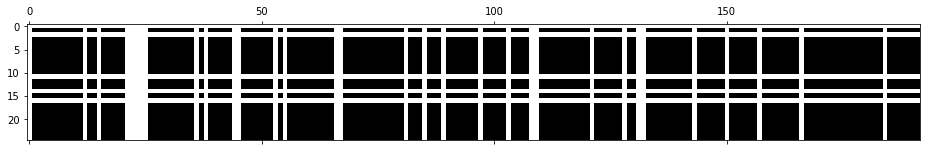

In [32]:
matshow(np.sum(np.expand_dims(parent_table, axis=-1) == parent_table_train.reshape((1, 1, -1)), axis=2), cmap=cm.Greys)

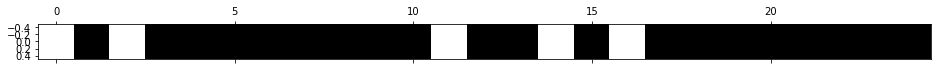

In [37]:
matshow(np.sum(np.expand_dims(np.arange(parent_table.shape[0]), axis=-1) == rows_train.reshape((1, -1)), axis=1).reshape((1, -1)), cmap=cm.Greys)

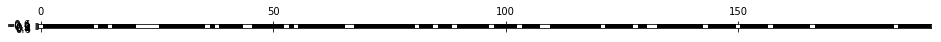

In [38]:
matshow(np.sum(np.expand_dims(np.arange(parent_table.shape[1]), axis=-1) == cols_train.reshape((1, -1)), axis=1).reshape((1, -1)), cmap=cm.Greys)